# Census Data Exploration 2: LA County Nativity and Citizenship Status 

A look at Los Angeles County nativity and citizenship status using U.S Census data. 

Annalise Gutierrez

# Loading the Libraries

In [2]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

# Importing the Data

In [3]:
# loading data file
gdf = gpd.read_file('acs2019_5yr_B05001_14000US06037534001.geojson')

# Preliminary Inspection

Looking at the size of the data

In [4]:
gdf.shape

(2347, 15)

In [5]:
gdf.head

<bound method NDFrame.head of                    geoid                                   name   B05001001  \
0           05000US06037                 Los Angeles County, CA  10081570.0   
1     14000US06037101110  Census Tract 1011.10, Los Angeles, CA      4283.0   
2     14000US06037101122  Census Tract 1011.22, Los Angeles, CA      3405.0   
3     14000US06037101210  Census Tract 1012.10, Los Angeles, CA      6347.0   
4     14000US06037101220  Census Tract 1012.20, Los Angeles, CA      3702.0   
...                  ...                                    ...         ...   
2342  14000US06037980031  Census Tract 9800.31, Los Angeles, CA      1175.0   
2343  14000US06037980033  Census Tract 9800.33, Los Angeles, CA        16.0   
2344  14000US06037990100     Census Tract 9901, Los Angeles, CA         0.0   
2345  14000US06037990200     Census Tract 9902, Los Angeles, CA         0.0   
2346  14000US06037990300     Census Tract 9903, Los Angeles, CA         0.0   

      B05001001, Erro

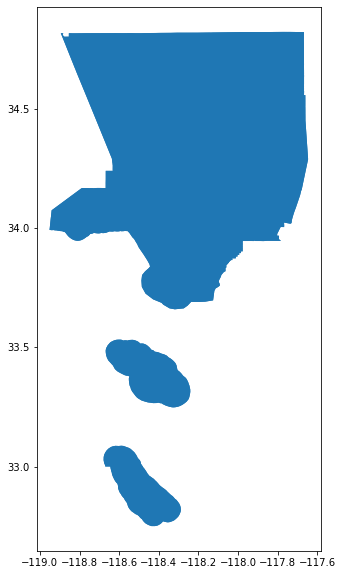

In [6]:
# plot
gdf.plot(figsize=(10,10))

# Overwriting default display settings

overriding the defaults to see the entire table instead of the first and last 10 columns

In [7]:
#to see all the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
gdf.sample() #getting a single sample from the data

,geoid,name,B05001001,"B05001001, Error",B05001002,"B05001002, Error",B05001003,"B05001003, Error",B05001004,"B05001004, Error",B05001005,"B05001005, Error",B05001006,"B05001006, Error",geometry
1668,14000US06037540902,"Census Tract 5409.02, Los Angeles, CA",4707.0,366.0,3636.0,362.0,0.0,12.0,94.0,73.0,243.0,117.0,734.0,229.0,"MULTIPOLYGON (((-118.28224 33.90552, -118.2822..."


# Data Types

In [9]:
# looking at the data types
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2347 non-null   object  
 1   name              2347 non-null   object  
 2   B05001001         2347 non-null   float64 
 3   B05001001, Error  2347 non-null   float64 
 4   B05001002         2347 non-null   float64 
 5   B05001002, Error  2347 non-null   float64 
 6   B05001003         2347 non-null   float64 
 7   B05001003, Error  2347 non-null   float64 
 8   B05001004         2347 non-null   float64 
 9   B05001004, Error  2347 non-null   float64 
 10  B05001005         2347 non-null   float64 
 11  B05001005, Error  2347 non-null   float64 
 12  B05001006         2347 non-null   float64 
 13  B05001006, Error  2347 non-null   float64 
 14  geometry          2347 non-null   geometry
dtypes: float64(12), geometry(1), object(2)
memory usage: 275.2+ KB


# Deleting County Row

Deleating the first row in the data since it is for the entire county.

In [10]:
gdf.head() #to see the first row

,geoid,name,B05001001,"B05001001, Error",B05001002,"B05001002, Error",B05001003,"B05001003, Error",B05001004,"B05001004, Error",B05001005,"B05001005, Error",B05001006,"B05001006, Error",geometry
0,05000US06037,"Los Angeles County, CA",10081570.0,0.0,6533033.0,13628.0,15325.0,943.0,102677.0,2836.0,1792764.0,9238.0,1637771.0,13159.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,2799.0,376.0,0.0,12.0,60.0,66.0,884.0,243.0,540.0,239.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,2387.0,330.0,0.0,12.0,208.0,133.0,746.0,169.0,64.0,46.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3090.0,403.0,0.0,17.0,90.0,77.0,1944.0,265.0,1223.0,410.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,1902.0,248.0,0.0,12.0,51.0,38.0,1240.0,233.0,509.0,149.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [11]:
# dropping the row with index 0 (i.e. the first row)
gdf = gdf.drop([0])

In [12]:
# checking to see if it has been deleted
gdf.head()

,geoid,name,B05001001,"B05001001, Error",B05001002,"B05001002, Error",B05001003,"B05001003, Error",B05001004,"B05001004, Error",B05001005,"B05001005, Error",B05001006,"B05001006, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,2799.0,376.0,0.0,12.0,60.0,66.0,884.0,243.0,540.0,239.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,2387.0,330.0,0.0,12.0,208.0,133.0,746.0,169.0,64.0,46.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3090.0,403.0,0.0,17.0,90.0,77.0,1944.0,265.0,1223.0,410.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,1902.0,248.0,0.0,12.0,51.0,38.0,1240.0,233.0,509.0,149.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,2179.0,342.0,9.0,20.0,38.0,32.0,1281.0,225.0,377.0,198.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


# Renaming Columns

Renaming the columns so they are easier to read

In [13]:
list(gdf) #same as df.columns.to_list()

['geoid',
 'name',
 'B05001001',
 'B05001001, Error',
 'B05001002',
 'B05001002, Error',
 'B05001003',
 'B05001003, Error',
 'B05001004',
 'B05001004, Error',
 'B05001005',
 'B05001005, Error',
 'B05001006',
 'B05001006, Error',
 'geometry']

In [14]:
#putting new column names
gdf.columns = ['geoid',
 'Census Tract',
 'Total',
 'Error',
 'U.S. citizen, born in the United States',
 'Error',
 'U.S. citizen, born in Puerto Rico or U.S. Island Areas',
 'Error',
 'U.S. citizen, born abroad of American parent(s)',
 'Error',
 'U.S. citizen by naturalization',
 'Error',
 'Not a U.S. citizen',
 'Error',
 'geometry']

In [15]:
gdf.head() #checking to confirm it worked

,geoid,Census Tract,Total,Error,"U.S. citizen, born in the United States",Error,"U.S. citizen, born in Puerto Rico or U.S. Island Areas",Error,"U.S. citizen, born abroad of American parent(s)",Error,U.S. citizen by naturalization,Error,Not a U.S. citizen,Error,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,2799.0,376.0,0.0,12.0,60.0,66.0,884.0,243.0,540.0,239.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,2387.0,330.0,0.0,12.0,208.0,133.0,746.0,169.0,64.0,46.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3090.0,403.0,0.0,17.0,90.0,77.0,1944.0,265.0,1223.0,410.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,1902.0,248.0,0.0,12.0,51.0,38.0,1240.0,233.0,509.0,149.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,2179.0,342.0,9.0,20.0,38.0,32.0,1281.0,225.0,377.0,198.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


# Double checking data integrity

In [16]:
# get random record
random_tract = gdf.sample()
random_tract

,geoid,Census Tract,Total,Error,"U.S. citizen, born in the United States",Error,"U.S. citizen, born in Puerto Rico or U.S. Island Areas",Error,"U.S. citizen, born abroad of American parent(s)",Error,U.S. citizen by naturalization,Error,Not a U.S. citizen,Error,geometry
99,14000US06037113321,"Census Tract 1133.21, Los Angeles, CA",6180.0,653.0,4357.0,678.0,0.0,17.0,0.0,17.0,1094.0,344.0,729.0,357.0,"MULTIPOLYGON (((-118.59853 34.25000, -118.5984..."


# Simple Stats and Plots

Simple stats of the "Not a U.S Citizen" column

In [17]:
#access a single column like df['col_name']
gdf['Not a U.S. citizen'].head()

1     540.0
2      64.0
3    1223.0
4     509.0
5     377.0
Name: Not a U.S. citizen, dtype: float64

In [18]:
# What is the mean?
gdf['Not a U.S. citizen'].mean()

698.11210571185

In [19]:
# What is the median?
gdf['Not a U.S. citizen'].median()

600.5

In [20]:
# more stats
gdf['Not a U.S. citizen'].describe()

count    2346.000000
mean      698.112106
std       496.600189
min         0.000000
25%       302.250000
50%       600.500000
75%      1001.000000
max      3383.000000
Name: Not a U.S. citizen, dtype: float64

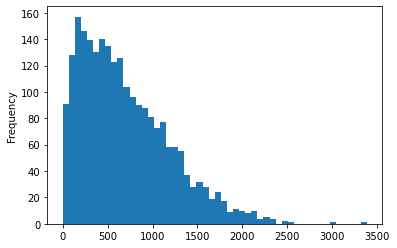

In [21]:
# plotting as historgram with 50 bins
gdf['Not a U.S. citizen'].plot.hist(bins=50)

# Sorting 

What are the 10 census tracts with the highest non citizens? The lowest?

In [22]:
gdf_sorted_highest = gdf.sort_values(by='Not a U.S. citizen',ascending = False)

In [23]:
gdf_sorted_lowest = gdf.sort_values(by='Not a U.S. citizen',ascending = True)

In [24]:
# displaying the data, but just a few columns
gdf_sorted_highest[['Census Tract','Not a U.S. citizen']].head(10)

,Census Tract,Not a U.S. citizen
706,"Census Tract 2267, Los Angeles, CA",3383.0
1027,"Census Tract 3024.01, Los Angeles, CA",3042.0
1577,"Census Tract 5329, Los Angeles, CA",2515.0
564,"Census Tract 2091.02, Los Angeles, CA",2479.0
570,"Census Tract 2094.02, Los Angeles, CA",2452.0
1942,"Census Tract 6001, Los Angeles, CA",2360.0
127,"Census Tract 1175.30, Los Angeles, CA",2359.0
741,"Census Tract 2323, Los Angeles, CA",2321.0
2065,"Census Tract 6506.02, Los Angeles, CA",2303.0
1629,"Census Tract 5351.01, Los Angeles, CA",2261.0


In [25]:
gdf_sorted_lowest[['Census Tract','Not a U.S. citizen']].head(10)

,Census Tract,Not a U.S. citizen
2346,"Census Tract 9903, Los Angeles, CA",0.0
2320,"Census Tract 9800.03, Los Angeles, CA",0.0
2321,"Census Tract 9800.04, Los Angeles, CA",0.0
2322,"Census Tract 9800.05, Los Angeles, CA",0.0
2323,"Census Tract 9800.06, Los Angeles, CA",0.0
2324,"Census Tract 9800.07, Los Angeles, CA",0.0
2325,"Census Tract 9800.08, Los Angeles, CA",0.0
2328,"Census Tract 9800.13, Los Angeles, CA",0.0
2329,"Census Tract 9800.14, Los Angeles, CA",0.0
1055,"Census Tract 3200, Los Angeles, CA",0.0


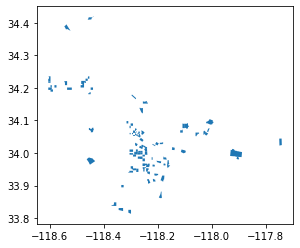

In [26]:
# plotting tracts with highest non-citizens reported
gdf_sorted_highest.head(100).plot()

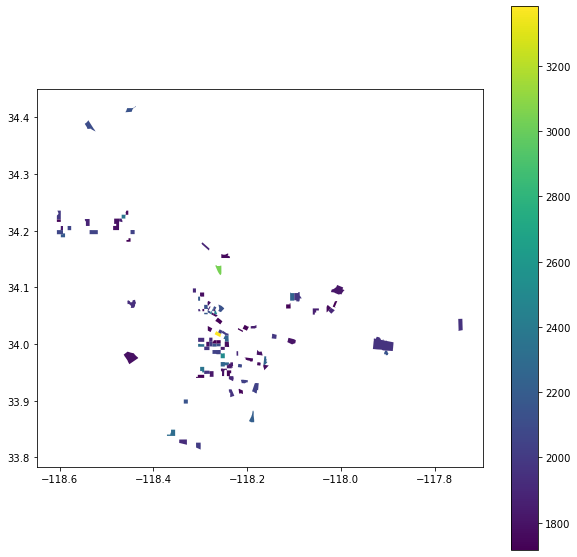

In [27]:
# plot it pt.2
gdf_sorted_highest.head(100).plot(figsize=(10,10),column='Not a U.S. citizen',legend=True)

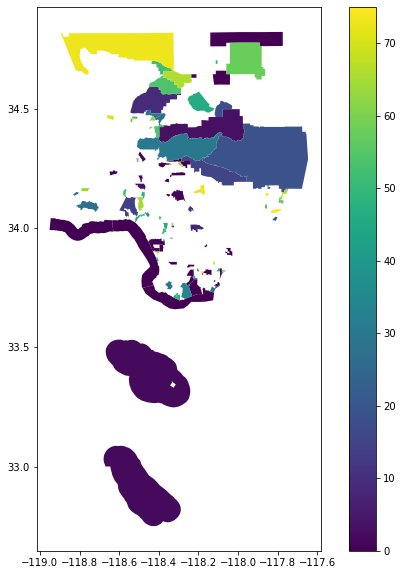

In [28]:
# plotting census tracts with lowest/no non-citzens reported 
gdf_sorted_lowest.head(100).plot(figsize=(10,10),column='Not a U.S. citizen',legend=True)

# Normalizing Data

In [29]:
# outputing columns
list(gdf)

['geoid',
 'Census Tract',
 'Total',
 'Error',
 'U.S. citizen, born in the United States',
 'Error',
 'U.S. citizen, born in Puerto Rico or U.S. Island Areas',
 'Error',
 'U.S. citizen, born abroad of American parent(s)',
 'Error',
 'U.S. citizen by naturalization',
 'Error',
 'Not a U.S. citizen',
 'Error',
 'geometry']

In [30]:
# create a new column, and populate it with normalized data to get the percent of total value
gdf['Percent U.S. citizen, born in the United States'] = gdf['U.S. citizen, born in the United States']/gdf['Total']*100
gdf['Percent U.S. citizen, born in Puerto Rico or U.S. Island Areas'] = gdf['U.S. citizen, born in Puerto Rico or U.S. Island Areas']/gdf['Total']*100
gdf['Percent U.S. citizen, born abroad of American parent(s)'] = gdf['U.S. citizen, born abroad of American parent(s)']/gdf['Total']*100
gdf['Percent U.S. citizen by naturalization'] = gdf['U.S. citizen by naturalization']/gdf['Total']*100
gdf['Percent Not a U.S. citizen'] = gdf['Not a U.S. citizen']/gdf['Total']*100


In [31]:
gdf.sample(5)

,geoid,Census Tract,Total,Error,"U.S. citizen, born in the United States",Error,"U.S. citizen, born in Puerto Rico or U.S. Island Areas",Error,"U.S. citizen, born abroad of American parent(s)",Error,U.S. citizen by naturalization,Error,Not a U.S. citizen,Error,geometry,"Percent U.S. citizen, born in the United States","Percent U.S. citizen, born in Puerto Rico or U.S. Island Areas","Percent U.S. citizen, born abroad of American parent(s)",Percent U.S. citizen by naturalization,Percent Not a U.S. citizen
1297,14000US06037431700,"Census Tract 4317, Los Angeles, CA",6000.0,707.0,2611.0,548.0,0.0,17.0,40.0,58.0,2860.0,430.0,489.0,309.0,"MULTIPOLYGON (((-118.05511 34.12230, -118.0550...",43.516667,0.000000,0.666667,47.666667,8.150000
357,14000US06037181500,"Census Tract 1815, Los Angeles, CA",3956.0,380.0,2649.0,295.0,35.0,46.0,38.0,29.0,911.0,254.0,323.0,125.0,"MULTIPOLYGON (((-118.20153 34.13351, -118.2015...",66.961577,0.884732,0.960566,23.028311,8.164813
189,14000US06037123901,"Census Tract 1239.01, Los Angeles, CA",4696.0,571.0,2636.0,405.0,16.0,32.0,19.0,17.0,1315.0,403.0,710.0,204.0,"MULTIPOLYGON (((-118.40184 34.19031, -118.3997...",56.132879,0.340716,0.404600,28.002555,15.119250
1239,14000US06037408202,"Census Tract 4082.02, Los Angeles, CA",2015.0,266.0,1304.0,225.0,0.0,12.0,0.0,12.0,312.0,91.0,399.0,129.0,"MULTIPOLYGON (((-117.99800 34.02967, -117.9978...",64.714640,0.000000,0.000000,15.483871,19.801489
1705,14000US06037543321,"Census Tract 5433.21, Los Angeles, CA",5446.0,373.0,3835.0,470.0,0.0,17.0,43.0,43.0,1087.0,257.0,481.0,237.0,"MULTIPOLYGON (((-118.26630 33.86691, -118.2663...",70.418656,0.000000,0.789570,19.959603,8.832170


# Sorting with Normalized Data

In [32]:
gdf_sorted_highest = gdf.sort_values(by='Percent Not a U.S. citizen',ascending = False)

In [33]:
gdf_sorted_lowest = gdf.sort_values(by='Percent Not a U.S. citizen',ascending = True)

In [34]:
# display the data, but just a few columns to keep it clean
gdf_sorted_highest[['Census Tract','Percent Not a U.S. citizen']].head(10)

,Census Tract,Percent Not a U.S. citizen
570,"Census Tract 2094.02, Los Angeles, CA",61.872319
561,"Census Tract 2089.02, Los Angeles, CA",55.609212
549,"Census Tract 2083.01, Los Angeles, CA",52.700186
562,"Census Tract 2089.03, Los Angeles, CA",51.461450
287,"Census Tract 1345.21, Los Angeles, CA",49.742617
595,"Census Tract 2119.21, Los Angeles, CA",48.829829
572,"Census Tract 2095.10, Los Angeles, CA",47.626788
600,"Census Tract 2122.03, Los Angeles, CA",47.117364
569,"Census Tract 2094.01, Los Angeles, CA",46.981216
602,"Census Tract 2123.03, Los Angeles, CA",45.686734


In [35]:
# displaying the data
gdf_sorted_lowest[['Census Tract','Percent Not a U.S. citizen']].head(10)

,Census Tract,Percent Not a U.S. citizen
2343,"Census Tract 9800.33, Los Angeles, CA",0.000000
1522,"Census Tract 5041.02, Los Angeles, CA",0.000000
1892,"Census Tract 5747, Los Angeles, CA",0.000000
2221,"Census Tract 9103.01, Los Angeles, CA",0.000000
2325,"Census Tract 9800.08, Los Angeles, CA",0.000000
2329,"Census Tract 9800.14, Los Angeles, CA",0.000000
2334,"Census Tract 9800.21, Los Angeles, CA",0.000000
1747,"Census Tract 5516, Los Angeles, CA",0.000000
2339,"Census Tract 9800.26, Los Angeles, CA",0.000000
749,"Census Tract 2343, Los Angeles, CA",0.341656


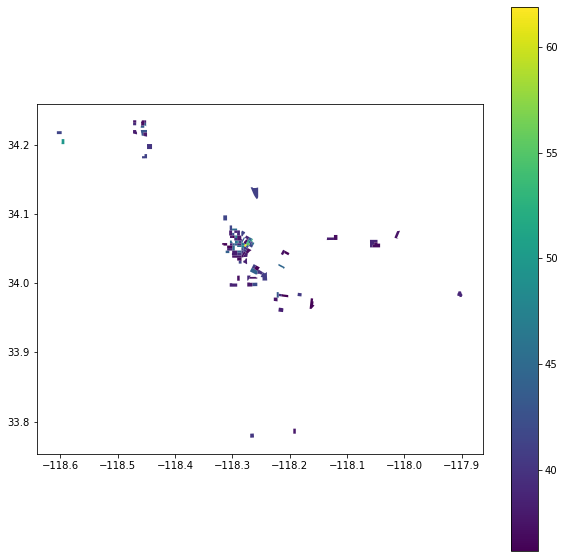

In [36]:
# plotting highest percent of non citizens reported 
gdf_sorted_highest.head(100).plot(figsize=(10,10),column='Percent Not a U.S. citizen',legend=True)

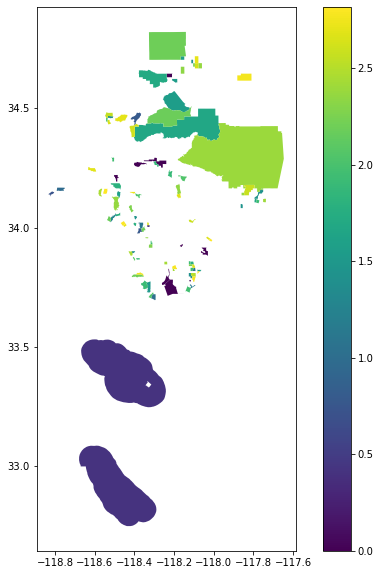

In [37]:
# plotting lowest
gdf_sorted_lowest.head(100).plot(figsize=(10,10),column='Percent Not a U.S. citizen',legend=True)

# Maps

In [38]:
# outputting columns
list(gdf)

['geoid',
 'Census Tract',
 'Total',
 'Error',
 'U.S. citizen, born in the United States',
 'Error',
 'U.S. citizen, born in Puerto Rico or U.S. Island Areas',
 'Error',
 'U.S. citizen, born abroad of American parent(s)',
 'Error',
 'U.S. citizen by naturalization',
 'Error',
 'Not a U.S. citizen',
 'Error',
 'geometry',
 'Percent U.S. citizen, born in the United States',
 'Percent U.S. citizen, born in Puerto Rico or U.S. Island Areas',
 'Percent U.S. citizen, born abroad of American parent(s)',
 'Percent U.S. citizen by naturalization',
 'Percent Not a U.S. citizen']

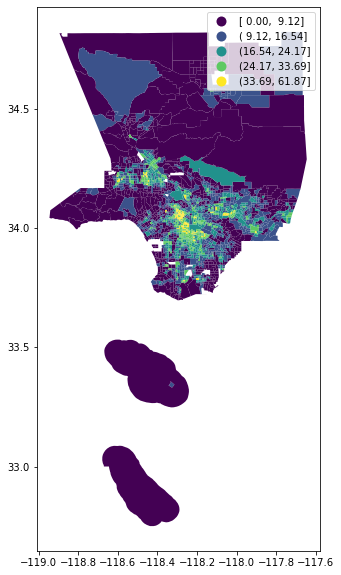

In [39]:
gdf.plot(figsize=(12,10),
                 column='Percent Not a U.S. citizen',
                 legend=True, 
                 scheme='NaturalBreaks')

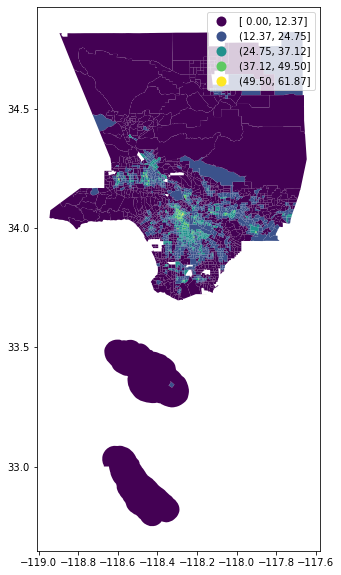

In [40]:
gdf.plot(figsize=(12,10),
                 column='Percent Not a U.S. citizen',
                 legend=True, 
                 scheme='equal_interval')

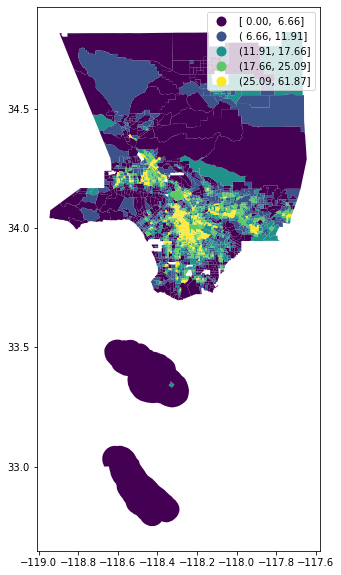

In [41]:
gdf.plot(figsize=(12,10),
                 column='Percent Not a U.S. citizen',
                 legend=True, 
                 scheme='quantiles')

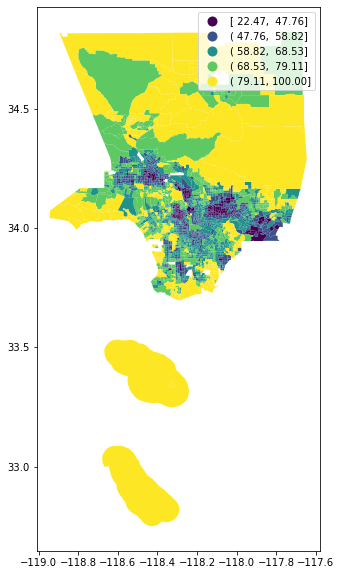

In [42]:
gdf.plot(figsize=(12,10),
                 column='Percent U.S. citizen, born in the United States',
                 legend=True, 
                 scheme='NaturalBreaks')

# Using subplots to create multiple plots¶

Text(0.5, 1.0, 'Percent Not a U.S. citizen')

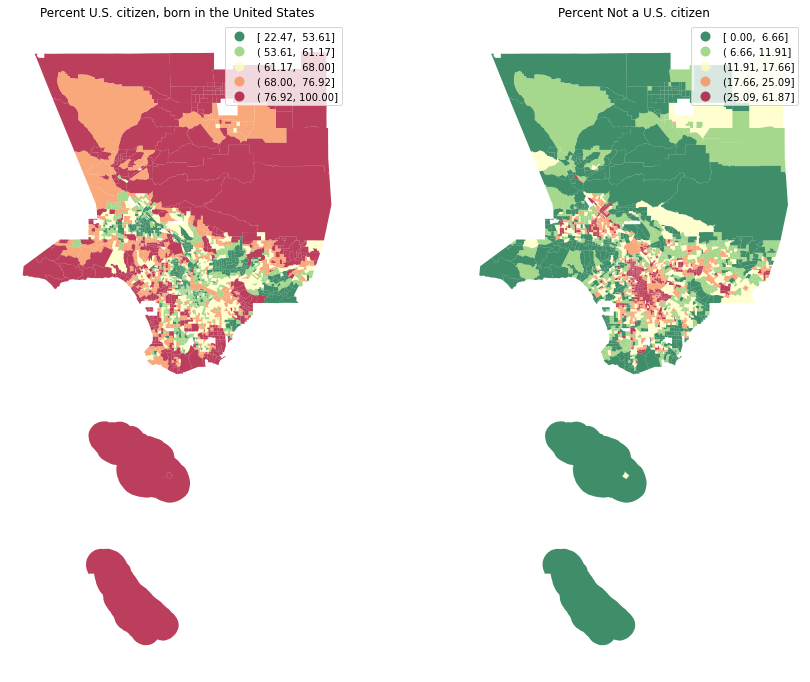

In [43]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf.plot(column='Percent U.S. citizen, born in the United States', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent U.S. citizen, born in the United States")

# spatial lag map on the right
gdf.plot(column='Percent Not a U.S. citizen', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Not a U.S. citizen")

# Additional Maps

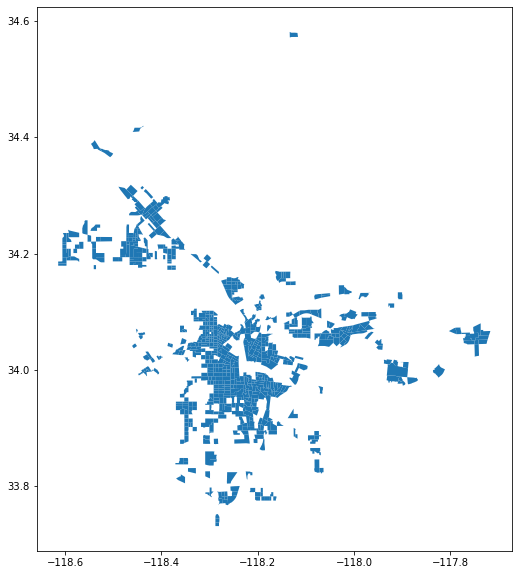

In [45]:
gdf[gdf['Percent Not a U.S. citizen'] > 20].plot(figsize=(12,10))

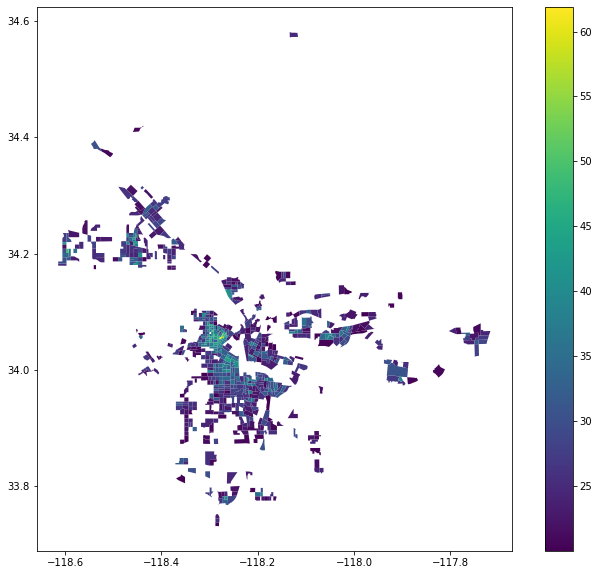

In [46]:
gdf[gdf['Percent Not a U.S. citizen'] > 20].plot(figsize=(12,10),column='Percent Not a U.S. citizen',legend=True)

# Adding a Basemap

In [47]:
# reproject to Web Mercator
gdf_web_mercator = gdf.to_crs(epsg=3857)

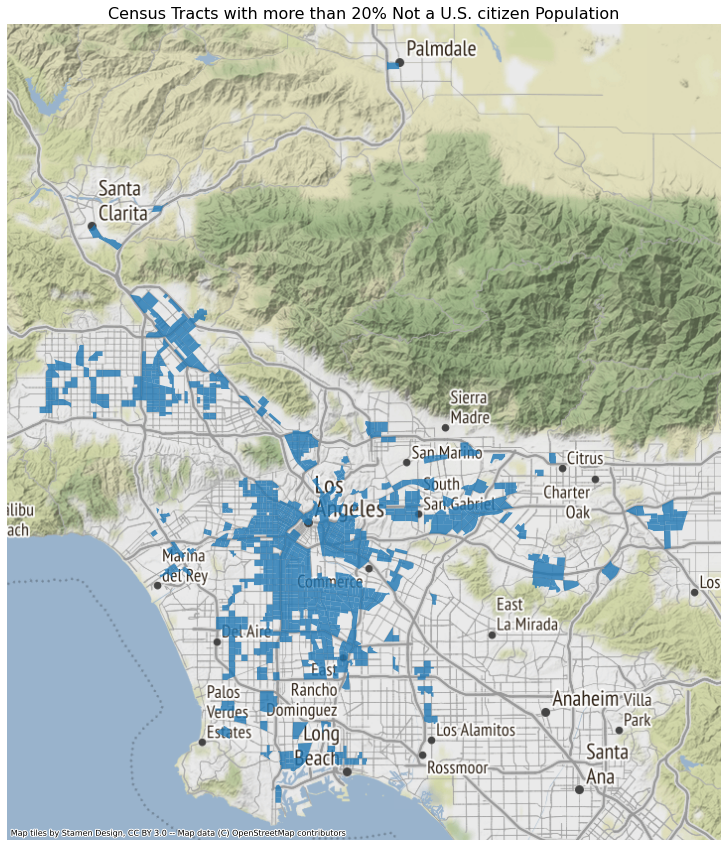

In [48]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent Not a U.S. citizen'] > 20].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 20% Not a U.S. citizen Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)